# LIONEL_AI_2024_MAJOR_PROJECT

## 1. Extraction and Reading of Data

In [3]:
import zipfile
import os

# Unzip the uploaded file to check its contents
uploaded_file_path = r"C:\Users\lione\Documents\AI_2024\AI_CORIZO_MINORPROJ\cardio_train.csv.zip"
extraction_path = r"C:\Users\lione\Documents\AI_2024\AI_CORIZO_MINORPROJ"

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files
os.listdir(extraction_path)

['.ipynb_checkpoints',
 'AI_LS_MAJORPROJ.ipynb',
 'AI_LS_MINIPROJ.ipynb',
 'cardio_data',
 'cardio_train.csv',
 'cardio_train.csv.zip',
 'Project 1 - Cardiovascular Disease Prediction.docx',
 'Project 2 - Spotify Genre Grouping.docx',
 'spotify dataset.csv']

In [4]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\lione\Documents\AI_2024\AI_CORIZO_MINORPROJ\cardio_train.csv.zip"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


(None,
   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
 0              0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
 1              1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
 2              2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
 3             3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
 4              4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               )

In [5]:
# Load the dataset with the correct delimiter
df = pd.read_csv(file_path, delimiter=';')

# Display basic information about the dataset after proper parsing
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


(None,
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            1     1      0   
 1   1  20228       1     156    85.0    140     90            3     1      0   
 2   2  18857       1     165    64.0    130     70            3     1      0   
 3   3  17623       2     169    82.0    150    100            1     1      0   
 4   4  17474       1     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  
 0     0       1       0  
 1     0       1       1  
 2     0       0       1  
 3     0       1       1  
 4     0       0       0  )

## 2. Data Preprocessing

In [7]:
# Data Pre-processing

# Step 2: Convert 'age' from days to years
df['age'] = (df['age'] / 365).astype(int)

# Step 3: Check for missing values
missing_values = df.isnull().sum()

# Step 4: Handle outliers by checking basic statistics and identifying unrealistic values
basic_statistics = df.describe()

# Step 5: Encode categorical variables (if any)
# Gender: 1 - female, 2 - male
df['gender'] = df['gender'].replace({1: 0, 2: 1})  # 0: female, 1: male

# Displaying missing values and head of the cleaned dataframe
missing_values, df.head()

(id             0
 age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 dtype: int64,
    id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0   50       1     168    62.0    110     80            1     1      0   
 1   1   55       0     156    85.0    140     90            3     1      0   
 2   2   51       0     165    64.0    130     70            3     1      0   
 3   3   48       1     169    82.0    150    100            1     1      0   
 4   4   47       0     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  
 0     0       1       0  
 1     0       1       1  
 2     0       0       1  
 3     0       1       1  
 4     0       0       0  )

## 3. Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

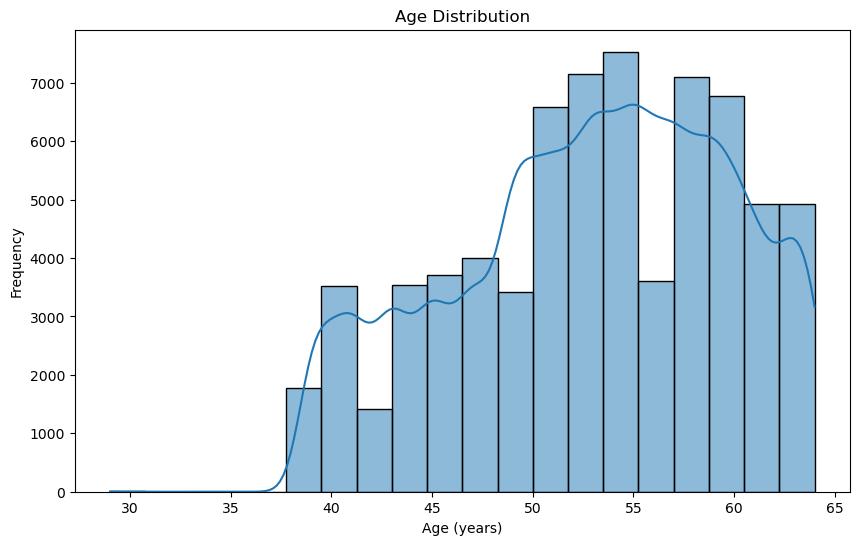

In [10]:
# Step 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

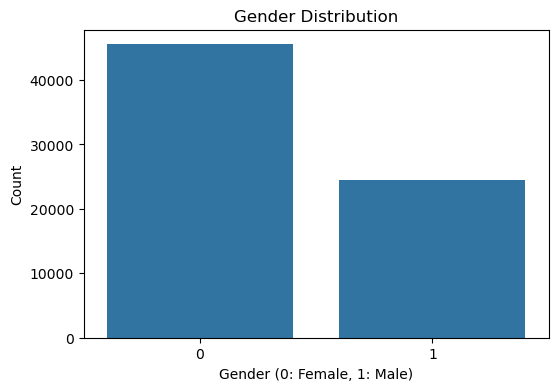

In [11]:
# Step 2: Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

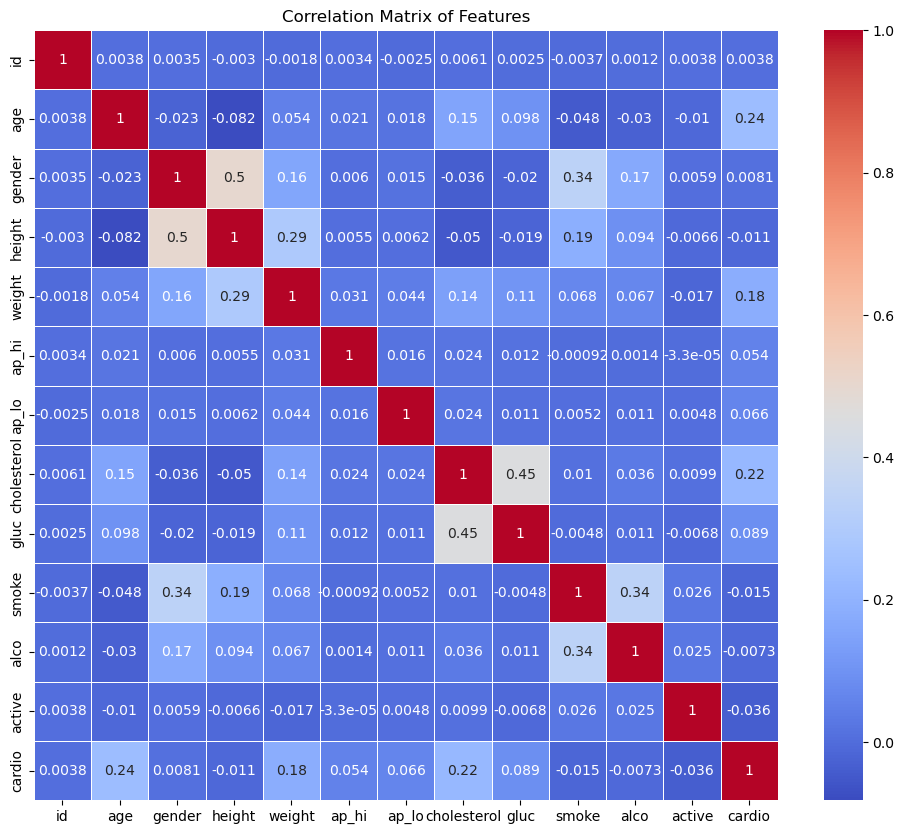

In [12]:
# Step 3: Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

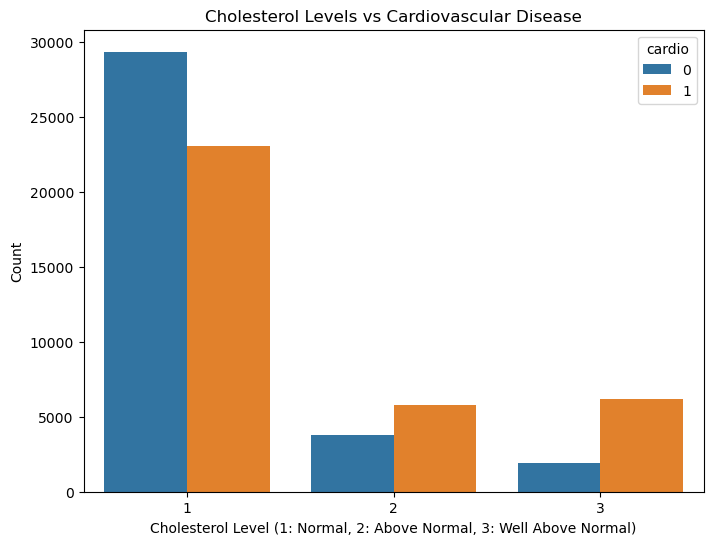

In [13]:
# Step 4: Cholesterol vs Cardio
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cholesterol', hue='cardio')
plt.title('Cholesterol Levels vs Cardiovascular Disease')
plt.xlabel('Cholesterol Level (1: Normal, 2: Above Normal, 3: Well Above Normal)')
plt.ylabel('Count')
plt.show()

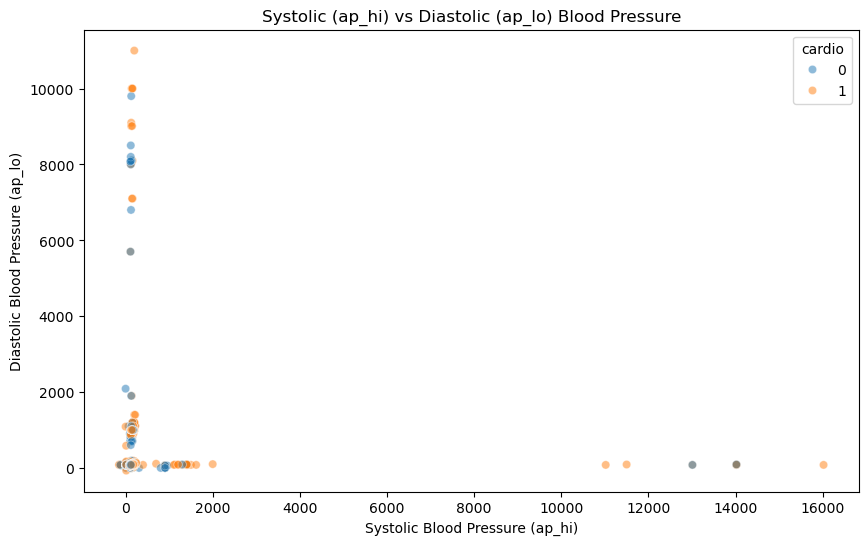

In [14]:
# Step 5: Blood Pressure (ap_hi vs ap_lo)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ap_hi', y='ap_lo', hue='cardio', alpha=0.5)
plt.title('Systolic (ap_hi) vs Diastolic (ap_lo) Blood Pressure')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.show()

## 4. Building and Evaluation of Models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Step 1: Splitting the dataset into features and target
X = df.drop(columns=['cardio'])
y = df['cardio']

In [18]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Step 3: Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Step 4: Defining and training models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

In [21]:
# Step 5: Evaluating models
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

In [22]:
# Displaying accuracies
accuracies

{'SVM': 0.7305,
 'KNN': 0.6278571428571429,
 'Decision Tree': 0.6262142857142857,
 'Logistic Regression': 0.7229285714285715,
 'Random Forest': 0.7196428571428571}

Clearly we can see the best models are SVM, Logistic Regression and Random Forest Classifier

## 5. Final Model(Ensemble)

In [25]:
from sklearn.ensemble import VotingClassifier

In [26]:
# Step 1: Create an ensemble model using the best-performing models (SVM, Logistic Regression, Random Forest)
ensemble_model = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)),
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier())
    ],
    voting='soft'
)

In [27]:
# Step 2: Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [28]:
# Step 3: Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

In [29]:
# Displaying the accuracy of the ensemble model
ensemble_accuracy

0.7346428571428572